In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Loading Data**

In [ ]:
import pandas as pd

sheet_ids = {
    'sales': '11G2mcdRTBsMU_OZJduDmI06AzcqJHr_n',
    'purchase': '1IYBOgnDKkJLKDYayc2McpB9B5UYbAlBu'
}

dataframes = {
    name: pd.read_excel(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")
    for name, sheet_id in sheet_ids.items()
}

sales_df = dataframes['sales']
purchase_df = dataframes['purchase']


# **Basic EDA**

In [ ]:
# Display basic info about each dataset
purchase_info = purchase_df.info()
sales_info = sales_df.info()

# Show the first few rows of each to understand structure
purchase_head = purchase_df.head()
sales_head = sales_df.head()

purchase_df.columns, sales_df.columns, purchase_head, sales_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SellerName  512 non-null    object 
 1   P_Price     512 non-null    float64
 2   Quantity    512 non-null    int64  
 3   DisAmt      512 non-null    float64
 4   Net total   512 non-null    float64
 5   PRODUCT     512 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 24.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SN          8179 non-null   int64         
 1   PRODUCT     8179 non-null   object        
 2   DATE        8179 non-null   datetime64[ns]
 3   ItemName    8179 non-null   object        
 4   QTY         8179 non-null   int64         
 5   Sell Price  8179 non-null   float64       
 6   Gross    

(Index(['SellerName', 'P_Price', 'Quantity', 'DisAmt', 'Net total', 'PRODUCT'], dtype='object'),
 Index(['SN', 'PRODUCT', 'DATE', 'ItemName', 'QTY', 'Sell Price', 'Gross',
        'Discount', 'Sale Value', 'Margin', 'Net Profit', 'Category', 'Day'],
       dtype='object'),
              SellerName  P_Price  Quantity   DisAmt  Net total     PRODUCT
 0           S.K TRADING   382.40        10   77.783  190.56835  GENT SUITS
 1           S.K TRADING   382.40        20  152.960  374.75200  GENT SUITS
 2           S.K TRADING   411.37        10   83.215  203.87675       PANTS
 3           S.K TRADING   405.57        10   81.114  198.72930       PANTS
 4  SHRI M.C ENTERPRISES    99.93        10   19.986   48.96570       SOCKS,
       SN  PRODUCT       DATE ItemName  QTY  Sell Price   Gross  Discount  \
 0  16778   KURTIS 2022-12-01   KT-ANA    3       898.0  2694.0    404.10   
 1  16779   KURTIS 2022-12-01   KT-STR    1       918.0   918.0    137.70   
 2  16780   KURTIS 2022-12-01   KT-ANA

**Purchase Report Overview:**
- Rows: 512
- Columns: 6
- Fields: `SellerName`, `P_Price`, `Quantity`, `DisAmt`, `Net total`, `PRODUCT`

Each row represents a purchase of a product from a seller, including purchase price, discount, and net total.

**Sales Report Overview:**
- Rows: 8,179

- Columns: 13
- Fields: Includes `product name (PRODUCT)`, `date`, `quantity sold`, `pricing`, `gross`, `discounts`, `sale value`, `profit margin`, `category` etc.

## **Data Cleaning and Preprocessing**
We will do the following actions on our dataset:
- Column names were stripped and standardized with underscores.

- Capitalized product names in both datasets for uniformity.

- Calculate:

- Gross_Purchase = P_Price × Quantity

- Net_Purchase = Gross_Purchase - DisAmt

- Removed any entries with Quantity <= 0 (none remaining).

In [ ]:
purchase_df.columns = purchase_df.columns.str.strip().str.replace(" ", "_")
purchase_df['PRODUCT'] = purchase_df['PRODUCT'].str.strip().str.upper()

# Compute total purchase cost per row (P_Price * Quantity - DisAmt)
purchase_df['Gross_Purchase'] = purchase_df['P_Price'] * purchase_df['Quantity']
purchase_df['Purchase_Date'] = pd.NaT  # Will remain empty if date not available
purchase_df['Net_Purchase'] = purchase_df['Gross_Purchase'] - purchase_df['DisAmt']

# Clean sales data
sales_df.columns = sales_df.columns.str.strip().str.replace(" ", "_")
sales_df['PRODUCT'] = sales_df['PRODUCT'].str.strip().str.upper()

# Check for missing values and data types
missing_purchase = purchase_df.isnull().sum()
missing_sales = sales_df.isnull().sum()

# Convert any date column (already correct in sales_df)
sales_df = sales_df[sales_df['QTY'] > 0]
purchase_df = purchase_df[purchase_df['Quantity'] > 0]

# Summary statistics
purchase_summary = purchase_df.describe()
sales_summary = sales_df.describe()

missing_purchase, missing_sales, purchase_summary, sales_summary


(SellerName          0
 P_Price             0
 Quantity            0
 DisAmt              0
 Net_total           0
 PRODUCT             0
 Gross_Purchase      0
 Purchase_Date     512
 Net_Purchase        0
 dtype: int64,
 SN            0
 PRODUCT       0
 DATE          0
 ItemName      0
 QTY           0
 Sell_Price    0
 Gross         0
 Discount      0
 Sale_Value    0
 Margin        0
 Net_Profit    0
 Category      0
 Day           0
 dtype: int64,
            P_Price    Quantity       DisAmt      Net_total  Gross_Purchase  \
 count   512.000000  512.000000   512.000000     512.000000      512.000000   
 mean    478.855273   27.679688   235.809388   11000.188231    11977.090488   
 min      86.530000    1.000000     0.000000      17.740000      354.800000   
 25%     354.335000    4.000000    34.612000     132.368775     1933.187500   
 50%     402.450000   11.000000    90.578800    2543.007145     4726.600000   
 75%     589.530000   30.000000   246.411750   10919.642528    12513

Sales data is already date-aware, no missing values.

### **Summary Statistics**
- Purchase Data
  - Average Purchase Price: ₹479
  - Average Quantity per Purchase: 27.7 units
  - Average Net Purchase per entry: ₹11,741
  - Max Purchase Entry: ₹275,930

- Sales Data
  - Average Sale Price: ₹1,018
  - Average Quantity per Sale: 1.26 units
  - Average Net Profit per transaction: ₹230
  - Max Net Profit: ₹2,398

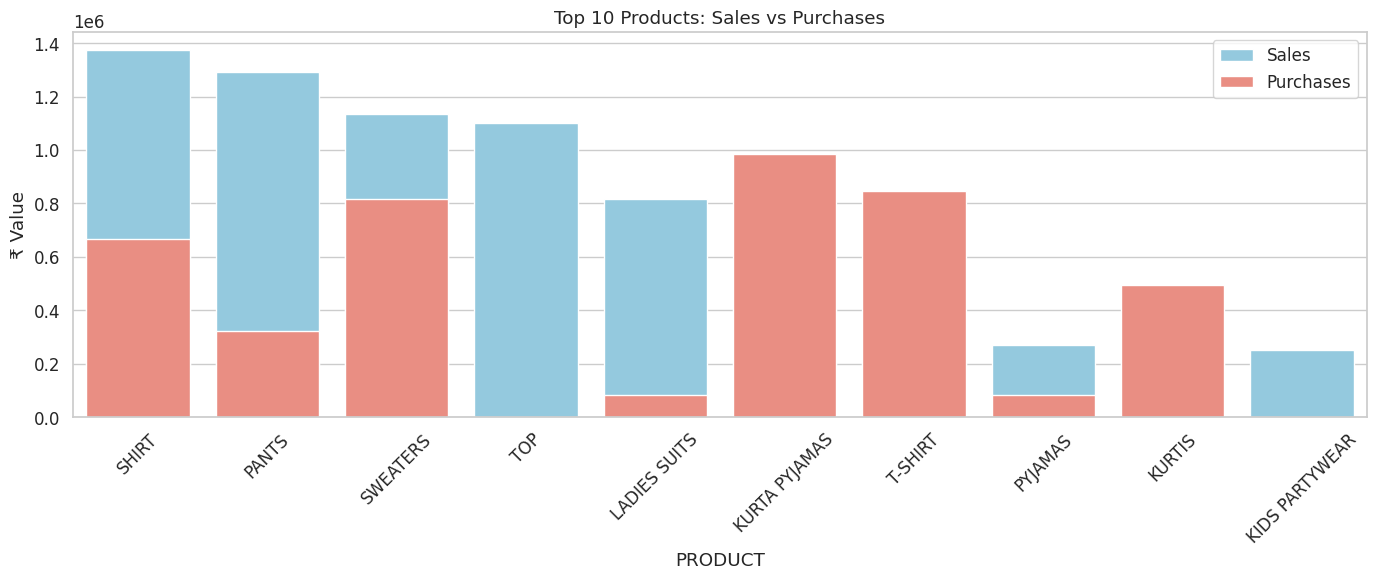

In [ ]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# Sales volume and profit by product
sales_product_summary = sales_df.groupby("PRODUCT").agg({
    "QTY": "sum",
    "Gross": "sum",
    "Sale_Value": "sum",
    "Net_Profit": "sum"
}).sort_values("Sale_Value", ascending=False).reset_index()

# Purchase volume and amount by product
purchase_product_summary = purchase_df.groupby("PRODUCT").agg({
    "Quantity": "sum",
    "Gross_Purchase": "sum",
    "Net_Purchase": "sum"
}).sort_values("Net_Purchase", ascending=False).reset_index()

# Merge for comparison
product_comparison = pd.merge(
    sales_product_summary,
    purchase_product_summary,
    how="outer",
    on="PRODUCT"
).fillna(0)

# Calculate profit margins
product_comparison["Unit_Sold"] = product_comparison["QTY"]
product_comparison["Unit_Purchased"] = product_comparison["Quantity"]
product_comparison["Stock_Difference"] = product_comparison["Quantity"] - product_comparison["QTY"]
product_comparison["Gross_Margin_%"] = (
    (product_comparison["Sale_Value"] - product_comparison["Net_Purchase"]) /
    product_comparison["Net_Purchase"].replace(0, 1)
) * 100

# Top 10 products by sale value
top_products = product_comparison.sort_values("Sale_Value", ascending=False).head(10)

# Comparison
plt.figure(figsize=(14, 6))
bar1 = sns.barplot(data=top_products, x="PRODUCT", y="Sale_Value", color='skyblue', label="Sales")
bar2 = sns.barplot(data=top_products, x="PRODUCT", y="Net_Purchase", color='salmon', label="Purchases")
plt.title("Top 10 Products: Sales vs Purchases")
plt.ylabel("₹ Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Insights from above analysis:**
- Healthy Margins: Some products like KURTIS, PANTS, and T-SHIRT show significantly higher sales compared to their purchase costs — indicating strong margins.
- Tight Margins or Overstock: Products like SOCKS or PYJAMAS show a smaller gap between purchase and sales — possibly due to:
  - Lower pricing power
  - Overstocking
  - Heavy discounting or bundling

In [ ]:
inefficiencies = product_comparison.copy()

inefficiencies["Issue"] = "Healthy"
inefficiencies.loc[(inefficiencies["Stock_Difference"] > 100), "Issue"] = "Overstocked"
inefficiencies.loc[(inefficiencies["Stock_Difference"] < -10), "Issue"] = "Stockout"
inefficiencies.loc[(inefficiencies["Gross_Margin_%"] < 15), "Issue"] = "Low Margin"


issue_summary = inefficiencies["Issue"].value_counts()

# Top 10 inefficient products for display
top_inefficient = inefficiencies[inefficiencies["Issue"] != "Healthy"].sort_values(
    by=["Gross_Margin_%", "Stock_Difference"], ascending=[True, False]
).head(10)

issue_summary, top_inefficient[[
    "PRODUCT", "QTY", "Quantity", "Stock_Difference", "Gross_Margin_%", "Issue"
]]


(Issue
 Low Margin     14
 Stockout        9
 Healthy         3
 Overstocked     2
 Name: count, dtype: int64,
           PRODUCT    QTY  Quantity  Stock_Difference  Gross_Margin_%  \
 5         JOGGERS    0.0      13.0              13.0     -100.000000   
 18         SHORTS   42.0     322.0             280.0      -82.217441   
 2      GENT SUITS   47.0    2659.0            2612.0      -73.481442   
 3        HANDBAGS    5.0      23.0              18.0      -65.044704   
 22     SWEATSHIRT   22.0      70.0              48.0      -60.659850   
 23        T-SHIRT  708.0    2085.0            1377.0      -54.681660   
 10   LADIES CAPRI   79.0     216.0             137.0      -54.510126   
 12       LEGGINGS   23.0      67.0              44.0      -54.169466   
 9          KURTIS  342.0     740.0             398.0      -46.191531   
 8   KURTA PYJAMAS  524.0    1360.0             836.0      -45.762045   
 
          Issue  
 5   Low Margin  
 18  Low Margin  
 2   Low Margin  
 3   Low Mar

**Issue Summary Across Products:**
- Low Margin: 14
- Stockout: 9
- Overstocked: 2
- Healthy: 3

`top_ineffecient` products are those which are overstocked and are generating negative or weak margins. They require price review, bundling, or liquidation strategies.

## **Root Cause Analysis**


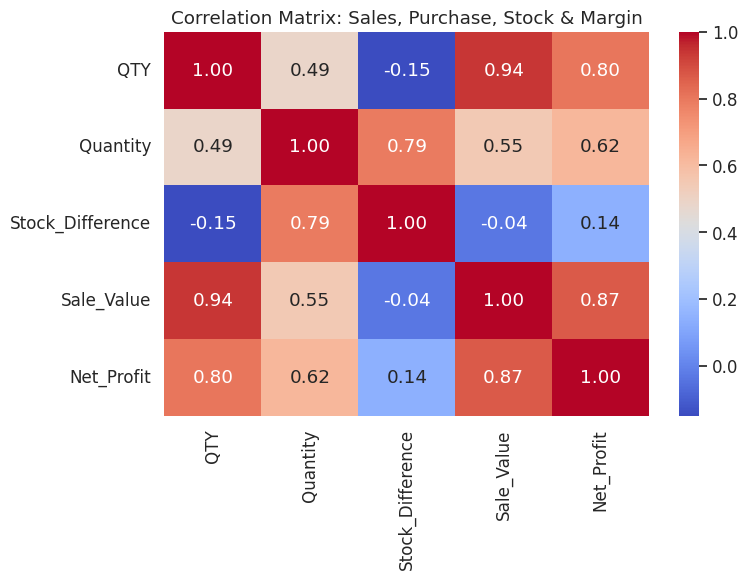

In [ ]:
# Focus on key numerical indicators
corr_df = product_comparison[["QTY", "Quantity", "Stock_Difference", "Sale_Value", "Net_Profit"]]

# Calculate correlations
correlations = corr_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Sales, Purchase, Stock & Margin")
plt.tight_layout()
plt.show()


Analysis of the **correlation matrix**:

- **More Sales = More Profit**: Higher quantity sold strongly increases both **revenue** and **profit**. `(QTY ↔ Sale_Value: 0.94, QTY ↔ Net_Profit: 0.80)`


- **Stock Changes Mostly Due to Purchases**: Stock difference is mostly driven by how much is **bought**, not sold. `(Quantity ↔ Stock_Difference: 0.79, QTY ↔ Stock_Difference: -0.15)`

- **Stock Levels Don’t Impact Profit Much**: Changes in stock have **almost no effect** on profit. `(Stock_Difference ↔ Net_Profit: 0.14)`


## **Product Segmentation via Clustering**
This is done using clustering algorithms, without any predefined labels. We are doing this to:

- Understand Product Behavior at Scale
- Enable Targeted Business Strategies
- Inventory Optimization
- Profitability Improvement


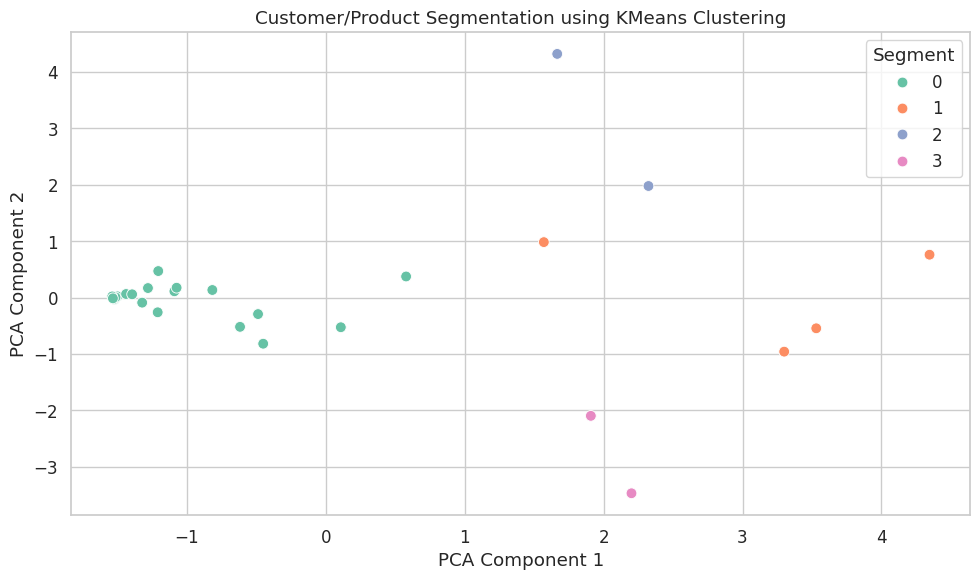

,Cluster,Quantity,QTY,Sale_Value,Net_Profit,Stock_Difference
0,0,133.8,110.6,83626.8,27562.8,23.2
1,1,1624.8,1100.8,1084341.1,161826.8,524.0
2,2,2372.0,377.5,311648.4,132245.4,1994.5
3,3,126.5,1248.0,958504.4,171586.2,-1121.5


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Scale the data
features = ['Quantity', 'QTY', 'Sale_Value', 'Net_Profit', 'Stock_Difference']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(product_comparison[features])

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Run KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
product_comparison['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=60)
plt.title('Customer/Product Segmentation using KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Segment')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate cluster centers and characteristics
cluster_summary = product_comparison.groupby('Cluster')[features].mean().round(1)
cluster_summary.reset_index(inplace=True)
cluster_summary



In [ ]:
product_comparison[['PRODUCT','Cluster']]

,PRODUCT,Cluster
0,BELTS,0
1,CAP,0
2,GENT SUITS,2
3,HANDBAGS,0
4,HANKIES,0
5,JOGGERS,0
6,KIDS CASUAL,0
7,KIDS PARTYWEAR,0
8,KURTA PYJAMAS,1
9,KURTIS,0


**Summary of cluster analysis is as follows:**

| Cluster | Name                           | Key Characteristics                                                                    | Products                                                                                                                                                                                                   |
| ------: | ------------------------------ | -------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
|   **0** | **Low Volume – Low Impact**    | Very low sales and purchases; minimal profit and stock movement.                       | BELTS, CAP, HANDBAGS, HANKIES, JOGGERS (and 15 other Items) |
|   **1** | **High Performer**             | High quantity sold and purchased; highest revenue and profit; healthy stock level.     | KURTA PYJAMAS, PANTS, SHIRT, SWEATERS                                                                                                                                                                      |
|   **2** | **Bulk Purchaser – Low Sales** | Very high purchase quantity, low sales; profit mainly from procurement; huge stock.    | GENT SUITS, T-SHIRT                                                                                                                                                                                        |
|   **3** | **Stock Drainer**              | Low purchases but high sales; strong revenue and profit, but stock is heavily reduced. | LADIES SUITS, TOP                                                                                                                                                                                          |


## **Sales by Product**

/tmp/ipython-input-15-2387805400.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PRODUCT', y='Sale_Value', data=product_sales, ax=ax1, palette='pastel', linewidth=0)


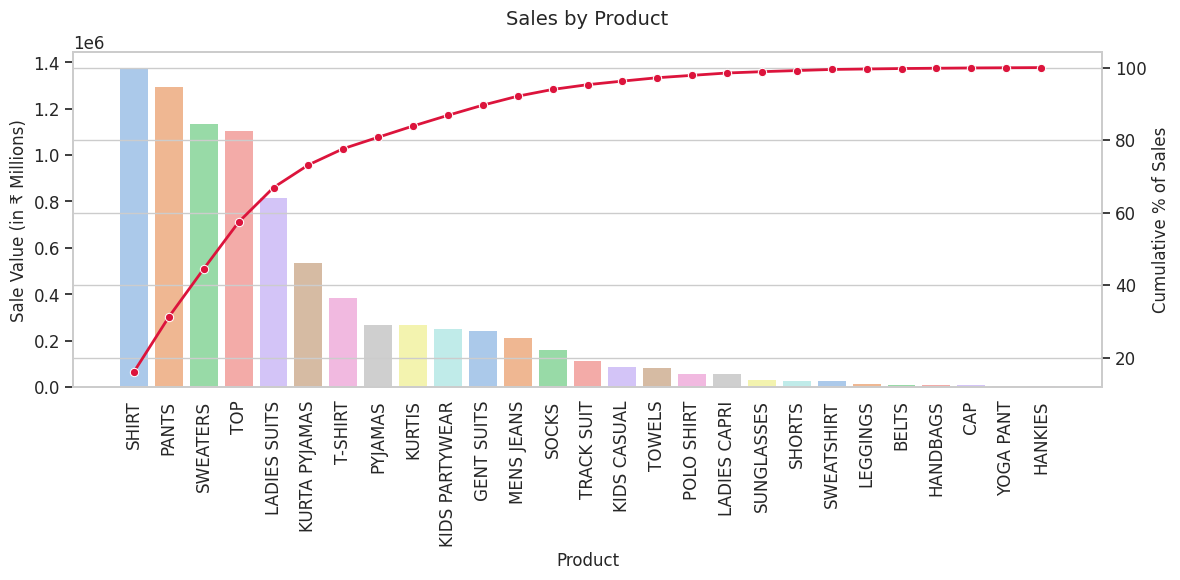

In [ ]:
product_sales = sales_df[sales_df['QTY'] > 0].groupby('PRODUCT')['Sale_Value'].sum().sort_values(ascending=False).reset_index()
product_sales['CP'] = product_sales['Sale_Value'].cumsum()
product_sales['CP_PCT'] = product_sales['CP'] / product_sales['Sale_Value'].sum() * 100


fig, ax1 = plt.subplots(figsize=(12, 6))

# left y-axis
sns.barplot(x='PRODUCT', y='Sale_Value', data=product_sales, ax=ax1, palette='pastel', linewidth=0)
ax1.set_ylabel('Sale Value (in ₹ Millions)', fontsize=12)
ax1.set_xlabel('Product', fontsize=12)
ax1.tick_params(axis='x', rotation=90)

# right y-axis
ax2 = ax1.twinx()
sns.lineplot(x='PRODUCT', y='CP_PCT', data=product_sales, ax=ax2, color='crimson', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative % of Sales', fontsize=12)
# ax2.yaxis.set_major_formatter(ticker.PercentFormatter())


plt.title('Sales by Product', fontsize=14, pad=20)
ax1.grid(False)
ax1.set_zorder(1)
ax2.set_zorder(2)

plt.tight_layout()
plt.show()

**Analysis of the** `Sales by Product Pareto chart` **:**
- The top 4 products — `SHIRT`, `PANTS`, `SWEATERS`, and `TOP` — contribute to the bulk of the revenue, visibly around **60-70%** of total sales.
- Products like `YOGA PANT`, `CAP`, `HANKIES`, `BELTS`, etc. have minimal contribution to overall revenue despite their presence in the catalog.



## **Sub Categroy Analysis**

In [ ]:
import plotly.express as px

# Aggregate sales data by PRODUCT and ItemName
sales_by_item = sales_df.groupby(['PRODUCT', 'ItemName']).agg({
    'Sale_Value': 'sum'
}).reset_index()

# Create a treemap
fig = px.treemap(sales_by_item,
                 path=['PRODUCT', 'ItemName'],
                 values='Sale_Value',
                 title='Sales by Product and Item Name')

fig.show()

In [ ]:
product_total_sales = sales_by_item.groupby('PRODUCT')['Sale_Value'].sum().reset_index()
product_total_sales.rename(columns={'Sale_Value': 'Product_Total_Sales'}, inplace=True)

sales_by_item = pd.merge(sales_by_item, product_total_sales, on='PRODUCT')

sales_by_item['Sales_Percentage'] = (sales_by_item['Sale_Value'] / sales_by_item['Product_Total_Sales']) * 100

sales_by_item_sorted = sales_by_item.sort_values(['PRODUCT', 'Sales_Percentage'], ascending=[True, False])

# Display the items that contribute most to each product's sales (e.g., items contributing more than 50%)
most_contributing_items = sales_by_item_sorted[sales_by_item_sorted['Sales_Percentage'] > 50]

display(most_contributing_items)

,PRODUCT,ItemName,Sale_Value,Product_Total_Sales,Sales_Percentage
1,BELTS,BE-LEA,9840.000,10496.00,93.750000
3,CAP,CP-SNA,5293.000,6891.00,76.810332
4,GENT SUITS,GS-DOU,163422.000,239877.00,68.127415
6,HANDBAGS,HB-CRO,5596.000,6995.00,80.000000
8,HANKIES,HK-FOR,4158.000,4158.00,100.000000
10,KIDS CASUAL,KC-GIR,46541.000,84661.00,54.973364
11,KIDS PARTYWEAR,KPW-BOY,179992.000,251916.00,71.449213
19,LADIES CAPRI,LC-COT,36514.300,55378.35,65.936056
29,LEGGINGS,LG-SOL,8884.800,11319.30,78.492486
31,MENS JEANS,MJ-SLI,108339.300,211558.20,51.210163


**Summary of Sub-category analysis**:

| Sales\_Percentage Range | Description             | Action Recommendation                                  |
| ----------------------- | ----------------------- | ------------------------------------------------------ |
| ≥ 90%                   | Single SKU-dominated category  | Optimize around that SKU  |
| 60–90%                  | Moderately concentrated | Evaluate boosting second-tier items |
| < 60%                   | Fragmented  |  Expand popular sub-segments   |


# Final Recommendations

1. **Initiate clearance strategies (discounting or bundling) for overstocked low-margin items like SOCKS and PYJAMAS.**

   * *Improvement:* Frees up inventory space and recovers tied-up capital.

2. **Temporarily halt purchasing products with consistently low sales performance (e.g., <10 units/month).**

   * *Improvement:* Reduces procurement waste and focuses resources on profitable SKUs.

3. **Review pricing of high-selling, high-margin products (e.g., KURTIS, T-SHIRT) and consider a slight markup (5-10%).**

   * *Improvement:* Boosts profitability without significantly affecting sales volumes.

4. **Implement a purchase control policy linked to recent sales trends (e.g., don't reorder unless 50% of current stock is sold).**

   * *Improvement:* Aligns procurement with demand, reducing risk of overstock.

5. **Define dynamic stock thresholds by product category based on past turnover and profit margins.**

   * *Improvement:* Ensures better inventory planning.

6. **Leverage product clusters to apply differentiated pricing, stocking, and promotion strategies per segment.**

   * *Improvement:* Maximizes margins and sales by tailoring actions to product behavior.

